In [1]:
## Instakart market basket analysis                  #Amaresh hiremani 22

# Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

# Reading datasets from external csv file

asiles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_prod_prior = pd.read_csv("order_products__prior.csv")
order_prod_train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")                                         

In [2]:
asiles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [32]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [33]:
order_prod_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [34]:
order_prod_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [35]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [36]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [15]:
#joining the asile and department dataframe to products and eleminating department_id ,asile_id and department 
# asile dataframe

product = pd.merge(products,asiles, on ='aisle_id',how = 'inner')
product.drop('aisle_id', axis = 1, inplace=True)
product = pd.merge(product,departments, on = 'department_id', how = 'inner')
product.drop('department_id', axis=1, inplace=True)
del departments
del asiles
product.head()                                                           #Amitkumar

,product_id,product_name,aisle,department
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,cookies cakes,snacks
2,102,Danish Butter Cookies,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,cookies cakes,snacks


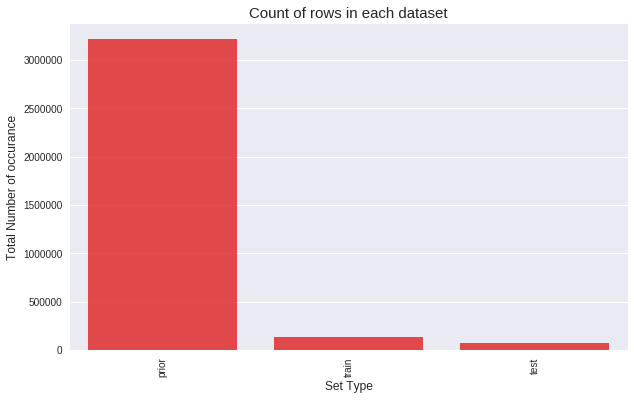

In [16]:
#different kind of evaluation set presrent in orders
count = orders.eval_set.value_counts()

plt.figure(figsize=(10,6))
sns.barplot(count.index, count.values, alpha=0.8, color='red')
plt.ylabel('Total Number of occurance', fontsize=12)
plt.xlabel('Set Type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()                                                                       #Amaresh hiremani 22

In [17]:
# here the previous order is divided into last ordered and prior to last ordered where 
# last ordered is divided into train and test set.

In [17]:
# getting count of each data set
def get_unique_count(x):
    return len(np.unique(x))
cnt = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt                                                                               #Amaresh hiremani 22

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [18]:
#checking for any null values in orders dataframe
orders.isnull().sum()                                              #Amaresh hiremani 22

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [2]:
# replacing the nan values with -1 (implies it is 1st order) from day_prior_order in orders and converting to type int
value = 0
orders['days_since_prior_order']=orders['days_since_prior_order'].fillna(value)
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype(int)
orders.isnull().sum()                                                 #Amaresh hiremani 22

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [20]:
# check unique values in day of week cloumn in order
np.unique(orders['order_dow'].values)                  #Abhinav sj 05

array([0, 1, 2, 3, 4, 5, 6])

In [21]:
# converting the day of week from integer to string
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
orders['order_dow'] = orders['order_dow'].apply(lambda x: days[x])
orders.head()                                                     #Abhinav sj 05

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,Weds,8,0
1,2398795,1,prior,2,Thurs,7,15
2,473747,1,prior,3,Thurs,12,21
3,2254736,1,prior,4,Fri,7,29
4,431534,1,prior,5,Fri,15,28


In [22]:
# checking unqiue order_ids in order
orders.order_id.nunique()                         #Amaresh hiremani 22

3421083

In [23]:
orders.shape                                      #Amaresh hiremani 22

(3421083, 7)

In [24]:
#dividing the orders into 3 eval type ie: prior,train,test and join order_product_prior and order_product_train
orders_prior = orders[orders['eval_set'] == 'prior']
orders_train = orders[orders['eval_set'] == 'train']
orders_test = orders[orders['eval_set'] == 'test']
orders_prior = pd.merge(orders_prior,order_prod_prior, on = 'order_id' ,how = 'inner')
orders_train = pd.merge(orders_train,order_prod_train, on = 'order_id' ,how = 'inner')  #Amaresh hiremani 22

In [25]:
#conacatating orders_prior and orders_train to form train and test data
train_df = pd.concat([orders_prior,orders_train])          #Amaresh hiremani 22

In [27]:
train_df.head(20)                   #Amaresh hiremani 22

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,Weds,8,0,196,1,0
1,2539329,1,prior,1,Weds,8,0,14084,2,0
2,2539329,1,prior,1,Weds,8,0,12427,3,0
3,2539329,1,prior,1,Weds,8,0,26088,4,0
4,2539329,1,prior,1,Weds,8,0,26405,5,0
5,2398795,1,prior,2,Thurs,7,15,196,1,1
6,2398795,1,prior,2,Thurs,7,15,10258,2,0
7,2398795,1,prior,2,Thurs,7,15,12427,3,1
8,2398795,1,prior,2,Thurs,7,15,13176,4,0
9,2398795,1,prior,2,Thurs,7,15,26088,5,1


In [8]:
#Analysis of order based on Hours of day ,Days since prior order,Day of week

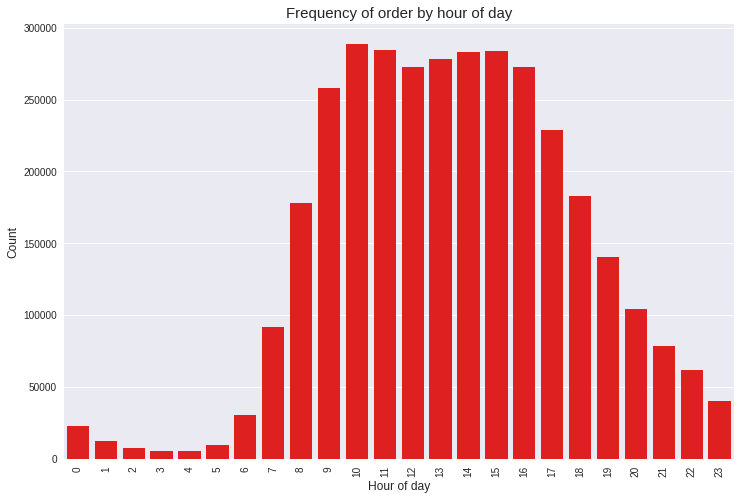

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders, color='red')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()                                             #Abhinav sj 05

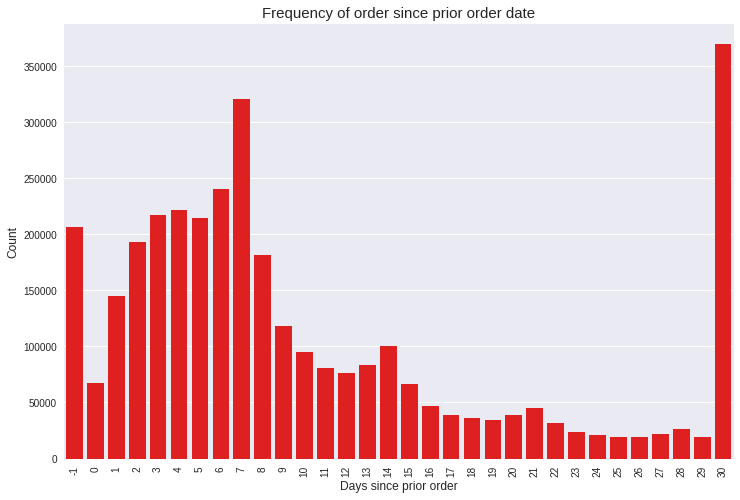

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color='red')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order since prior order date", fontsize=15)
plt.show()                             ##Abinav sj 05

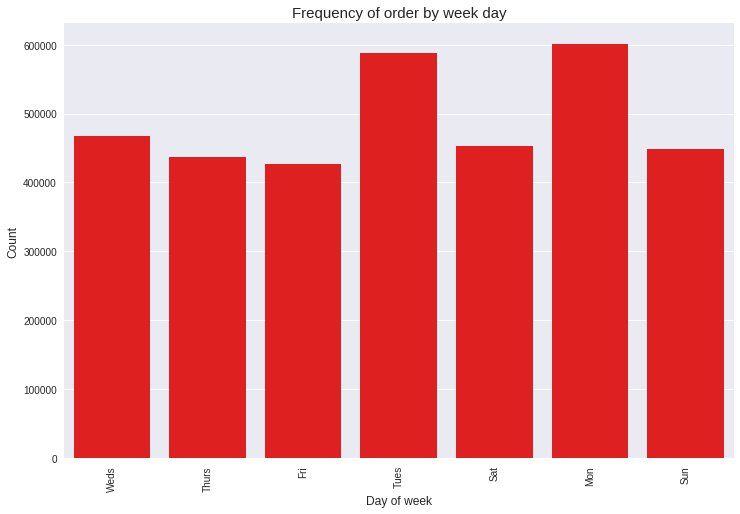

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color='red')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()                          #Abhinav sj 05

In [48]:
# Analysing the products 
# percentage of re-orders in prior set #
order_prod_prior.reordered.sum() / order_prod_prior.shape[0]   #Amit 23

0.5896974667922161

In [50]:
# percentage of re-orders in train set #
order_prod_train.reordered.sum() / order_prod_train.shape[0]    #Amit 23

0.5985944127509629

In [14]:
#products ordered in prior and test dataset
order_products_all = pd.concat([order_prod_train, order_prod_prior], axis=0)

print("The order_products_all size is : ", order_products_all.shape)       #Amit 23

The order_products_all size is :  (33819106, 4)


In [15]:
#checking any missing values
total = order_products_all.isnull().sum().sort_values(ascending=False)
percent = (order_products_all.isnull().sum()/order_products_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data                                                       #Amit 23

,Total Missing,Percent
reordered,0,0.0
add_to_cart_order,0,0.0
product_id,0,0.0
order_id,0,0.0


In [16]:
# Check the number of unique orders and unique products
orders_Unique = len(set(order_products_all.order_id))
products_Unique = len(set(order_products_all.product_id))
print("There are %s orders for %s products" %(orders_Unique, products_Unique))  #Amit 23

There are 3346083 orders for 49685 products


In [26]:
#most reordered products
grouped = order_products_all.groupby("product_id")["reordered"].aggregate({'Total_reorders': 'count'}).reset_index()
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:8]
grouped                                                                      #Amit 23

/home/amaresh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,product_id,Total_reorders,product_name
24849,24852,491291,Banana
13173,13176,394930,Bag of Organic Bananas
21134,21137,275577,Organic Strawberries
21900,21903,251705,Organic Baby Spinach
47205,47209,220877,Organic Hass Avocado
47762,47766,184224,Organic Avocado
47622,47626,160792,Large Lemon
16794,16797,149445,Strawberries


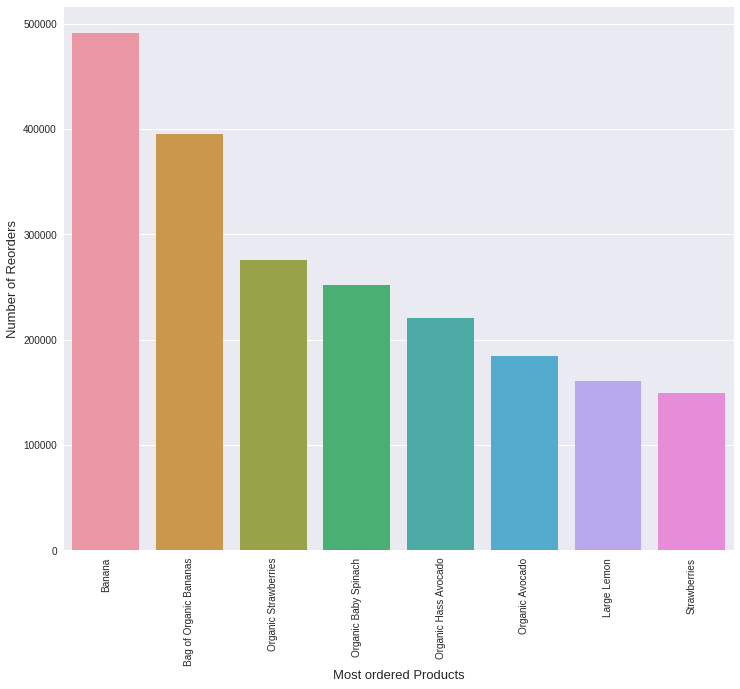

In [27]:
grouped  = grouped.groupby(['product_name']).sum()['Total_reorders'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()                                           #Amit 23